In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
print("hhel")

hhel


In [7]:
df = pd.read_csv('APPL.csv')

In [9]:
print(df.head())

         Date    Open    High     Low   Close    Volume  Adj Close
0  2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08
1  2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26
2  2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80
3  2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74
4  2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79


In [11]:
data = df['Close'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [13]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Y:\Temp\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [25]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0080
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.1603e-04
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.3429e-04
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.1076e-04
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.4283e-04
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 3.6445e-04
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.2488e-04
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.0936e-04
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.7759e-04
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 2.6294e-04
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.8310e-04
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.7023e-04
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.2851e-04
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.9448e-04
Epoch

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 57.26092379337162
Test RMSE: 38.85461565911806


In [35]:
look_back = time_step
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

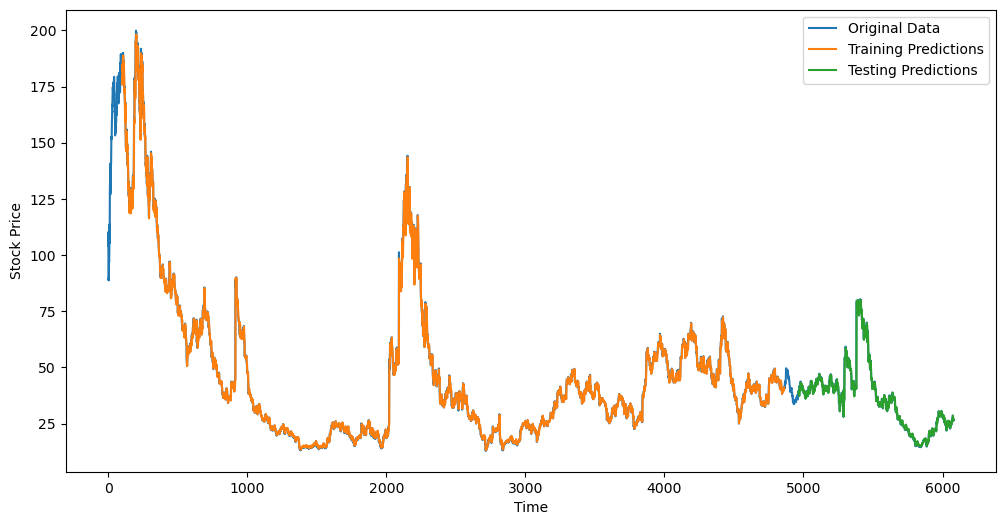

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

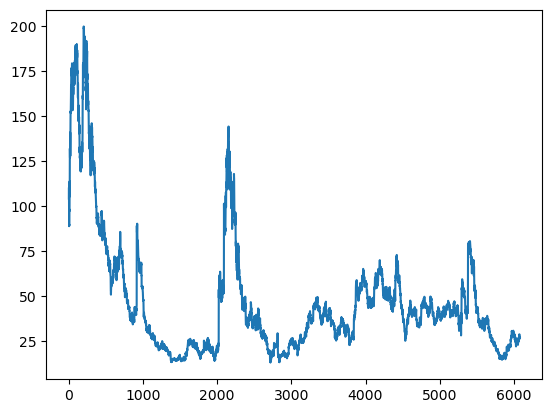

In [39]:
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')

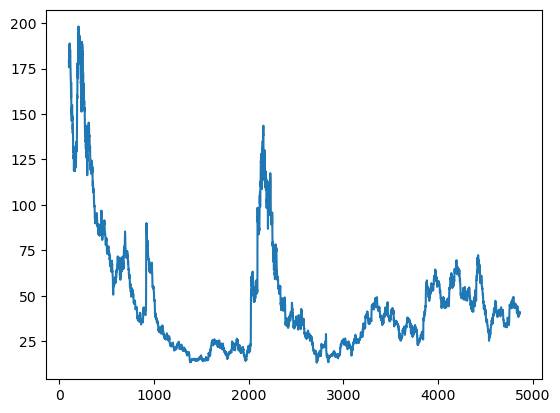

In [41]:
plt.plot(train_plot, label='Training Predictions')

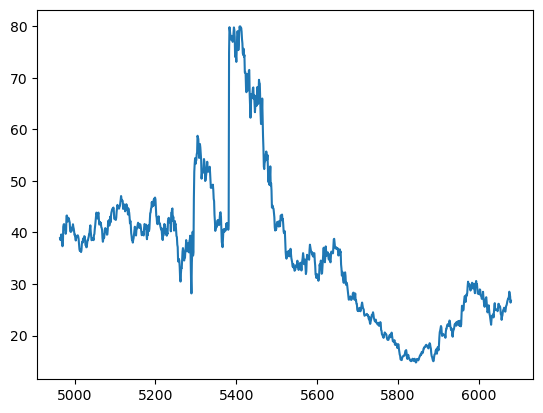

In [43]:
plt.plot(test_plot, label='Testing Predictions')